In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
happyness=pd.read_csv('happyness_score.csv')
happyness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happyness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
happyness.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df=pd.DataFrame(data=happyness)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

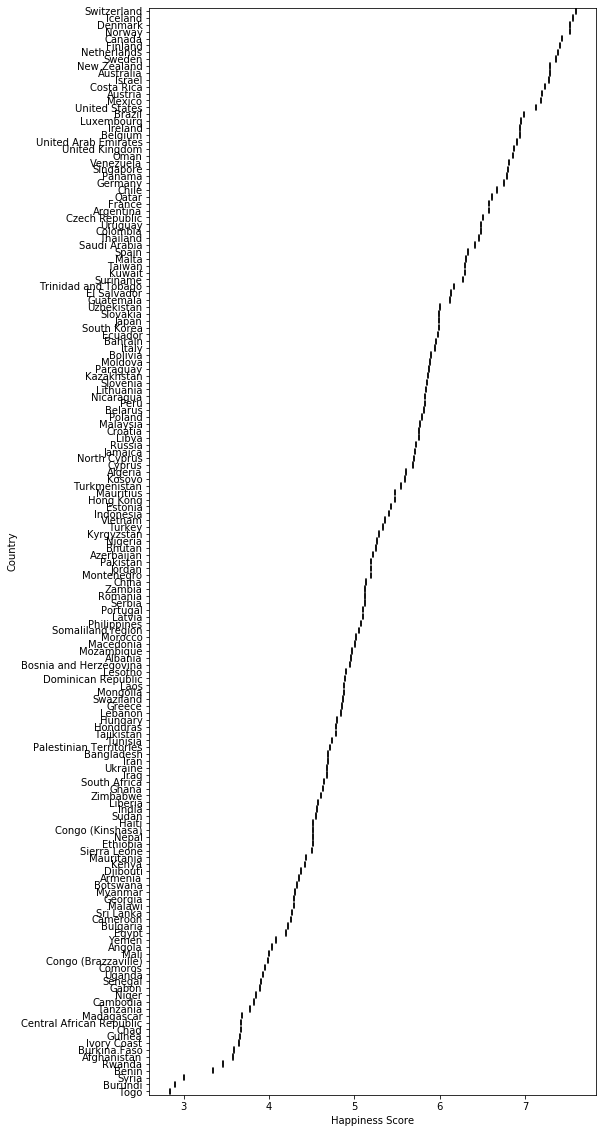

In [8]:
plt.figure(figsize=(8,20))
sns.boxplot(x='Happiness Score',y='Country',data=df,palette='BuGn')

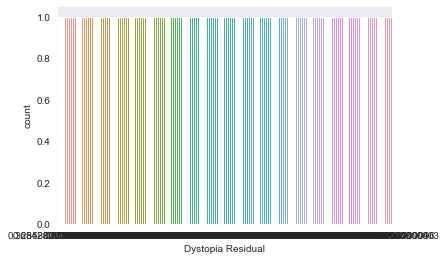

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Dystopia Residual',data=df)

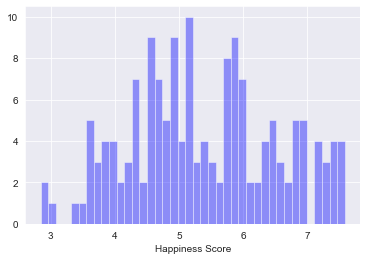

In [10]:
sns.distplot(df['Happiness Score'],kde=False,color='Blue',bins=40)

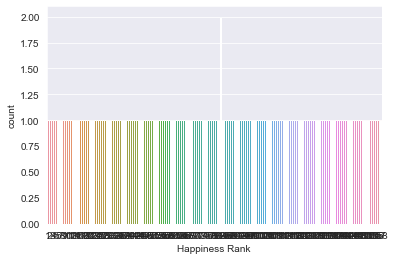

In [11]:
sns.countplot(x='Happiness Rank',data=df)

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [14]:
len(df['Country'].unique())

158

In [15]:
df['Country'].value_counts()

Bolivia                1
Romania                1
Togo                   1
Portugal               1
Armenia                1
                      ..
South Korea            1
Finland                1
Congo (Brazzaville)    1
Uruguay                1
Serbia                 1
Name: Country, Length: 158, dtype: int64

In [16]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [17]:
eastern_asia=df[df['Region']=='Eastern Asia']

In [18]:
h_score=eastern_asia.tail()

In [19]:
h_score

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759


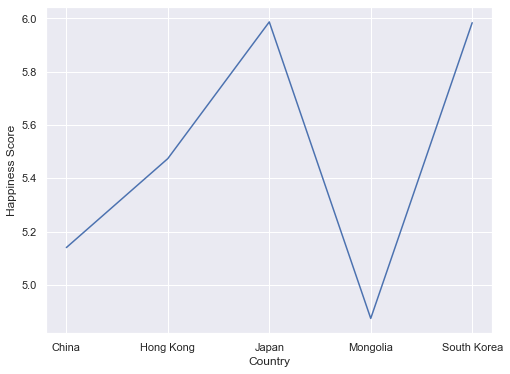

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='Country',y='Happiness Score',data=h_score)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for col in df.columns:
    if df[col].dtypes=='float':
        df[col]=le.fit_transform(df[col])

In [24]:
df.dtypes

Country                          object
Region                           object
Happiness Rank                    int64
Happiness Score                   int64
Standard Error                    int64
Economy (GDP per Capita)          int64
Family                            int64
Health (Life Expectancy)          int64
Freedom                           int64
Trust (Government Corruption)     int64
Generosity                        int64
Dystopia Residual                 int64
dtype: object

In [25]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,156,19,151,154,148,156,150,115,125
1,Iceland,Western Europe,2,155,100,136,157,150,143,98,144,134
2,Denmark,Western Europe,3,154,16,139,155,128,151,153,129,122
3,Norway,Western Europe,4,153,50,153,152,132,157,143,132,118
4,Canada,North America,5,152,26,140,151,140,145,141,145,116


In [36]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [38]:
pd.get_dummies(df['Country']).head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
country=pd.get_dummies(df['Country'],drop_first=True,prefix='Country')
region=pd.get_dummies(df['Region'],drop_first=True,prefix='Region')

In [40]:
df.drop(['Country','Region'],axis=1,inplace=True)

In [42]:
df=pd.concat([df,country,region],axis=1)

In [43]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,156,19,151,154,148,156,150,115,125,...,0,0,0,0,0,0,0,0,0,1
1,2,155,100,136,157,150,143,98,144,134,...,0,0,0,0,0,0,0,0,0,1
2,3,154,16,139,155,128,151,153,129,122,...,0,0,0,0,0,0,0,0,0,1
3,4,153,50,153,152,132,157,143,132,118,...,0,0,0,0,0,0,0,0,0,1
4,5,152,26,140,151,140,145,141,145,116,...,0,0,0,0,0,1,0,0,0,0


In [45]:
x=df.drop('Happiness Score',axis=1).head()
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Albania,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,19,151,154,148,156,150,115,125,0,...,0,0,0,0,0,0,0,0,0,1
1,2,100,136,157,150,143,98,144,134,0,...,0,0,0,0,0,0,0,0,0,1
2,3,16,139,155,128,151,153,129,122,0,...,0,0,0,0,0,0,0,0,0,1
3,4,50,153,152,132,157,143,132,118,0,...,0,0,0,0,0,0,0,0,0,1
4,5,26,140,151,140,145,141,145,116,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
y=df['Happiness Score'].head()
y

0    156
1    155
2    154
3    153
4    152
Name: Happiness Score, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [52]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predln=ln.predict(x_test)

In [55]:
print(predln)

[169.38018167 156.23307463]


In [54]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.0
[[0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]]
              precision    recall  f1-score   support

         152       0.00      0.00      0.00       1.0
         153       0.00      0.00      0.00       0.0
         154       0.00      0.00      0.00       0.0
         155       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

